<a href="https://colab.research.google.com/github/mrunaliyadav003/AI-ML/blob/main/Copy_of_trainaudio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install --upgrade torchaudio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install torchaudio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchaudio


In [6]:
# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=5)
        self.pool1 = nn.MaxPool1d(kernel_size=2)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3)
        self.pool2 = nn.MaxPool1d(kernel_size=2)
        self.fc1 = nn.Linear(in_features=32*39, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=1)

In [7]:
def forward(self, x):
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool2(torch.relu(self.conv2(x)))
        x = x.view(-1, 32*39)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [9]:
import os
import torchaudio

folder_path = '/content/drive/MyDrive/paras/Audio/filtered'

# Iterate through all the files in the folder
for file_name in os.listdir(folder_path):
    # Check if file is a WAV file
    if file_name.endswith('.wav'):
        # Load the audio file
        file_path = os.path.join(folder_path, file_name)
        waveform, sample_rate = torchaudio.load(file_path)

        # Do whatever you want with the waveform and sample rate here

In [ ]:
# Load the audio file
#audio_file_path = '/content/drive/MyDrive/paras/Audio/filtered'
#waveform, sample_rate = torchaudio.load(audio_file_path)

In [10]:
# Preprocess the audio waveform
preprocess = nn.Sequential(
    torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=8000),
    torchaudio.transforms.MelSpectrogram(sample_rate=8000, n_fft=1024, hop_length=512, n_mels=64),
    torchaudio.transforms.FrequencyMasking(freq_mask_param=15),
    torchaudio.transforms.TimeMasking(time_mask_param=35)
)
spectrogram = preprocess(waveform.unsqueeze(0)).squeeze(0)


In [11]:
import torch
from torch.utils.data import TensorDataset, DataLoader, random_split

# Create a dataset of spectrograms and corresponding labels
spectrograms = torch.randn(100, 128, 128)
labels = torch.randint(0, 10, (100,))

# Define the sizes for train and test sets
train_size = 80
test_size = 20

# Randomly split the dataset into train and test sets
train_dataset, test_dataset = random_split(
    TensorDataset(spectrograms, labels),
    [train_size, test_size]
)

# Create data loaders for train and test sets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [12]:
# Instantiate the neural network and optimizer
net = Net()
optimizer = optim.Adam(net.parameters(), lr=0.01)


In [17]:
import torch
import torch.nn as nn
torch.manual_seed(123)

# Define the neural network model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(10, 5)
        self.fc2 = nn.Linear(5, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.fc2(x)
        return x

# Define the training parameters
num_epochs = 90
batch_size = 64
learning_rate = 0.1

# Create the data loaders (dummy data for demonstration purposes)
train_data = torch.randn(1000, 10)
train_labels = torch.randn(1000, 1)
train_dataset = torch.utils.data.TensorDataset(train_data, train_labels)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size)

test_data = torch.randn(200, 10)
test_labels = torch.randn(200, 1)
test_dataset = torch.utils.data.TensorDataset(test_data, test_labels)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

# Initialize the neural network model and optimizer
net = Net()
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

# Train the neural network
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(train_loader)
    print('Epoch [%d], Loss: %.4f' % (epoch+1, epoch_loss))

# Evaluate the model on test data
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = net(inputs)
        predicted = torch.round(outputs)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print('Accuracy: %.2f %%' % accuracy)

Epoch [1], Loss: 1.0202
Epoch [2], Loss: 0.9935
Epoch [3], Loss: 0.9853
Epoch [4], Loss: 0.9820
Epoch [5], Loss: 0.9799
Epoch [6], Loss: 0.9785
Epoch [7], Loss: 0.9772
Epoch [8], Loss: 0.9763
Epoch [9], Loss: 0.9753
Epoch [10], Loss: 0.9742
Epoch [11], Loss: 0.9732
Epoch [12], Loss: 0.9724
Epoch [13], Loss: 0.9715
Epoch [14], Loss: 0.9706
Epoch [15], Loss: 0.9699
Epoch [16], Loss: 0.9695
Epoch [17], Loss: 0.9691
Epoch [18], Loss: 0.9687
Epoch [19], Loss: 0.9683
Epoch [20], Loss: 0.9680
Epoch [21], Loss: 0.9675
Epoch [22], Loss: 0.9671
Epoch [23], Loss: 0.9669
Epoch [24], Loss: 0.9666
Epoch [25], Loss: 0.9664
Epoch [26], Loss: 0.9662
Epoch [27], Loss: 0.9661
Epoch [28], Loss: 0.9659
Epoch [29], Loss: 0.9657
Epoch [30], Loss: 0.9657
Epoch [31], Loss: 0.9655
Epoch [32], Loss: 0.9652
Epoch [33], Loss: 0.9651
Epoch [34], Loss: 0.9650
Epoch [35], Loss: 0.9649
Epoch [36], Loss: 0.9647
Epoch [37], Loss: 0.9647
Epoch [38], Loss: 0.9647
Epoch [39], Loss: 0.9644
Epoch [40], Loss: 0.9644
Epoch [41

Epoch [1], Loss: 0.9523, Accuracy: 0.00 %
Epoch [2], Loss: 0.9522, Accuracy: 0.00 %
Epoch [3], Loss: 0.9523, Accuracy: 0.00 %
Epoch [4], Loss: 0.9522, Accuracy: 0.00 %
Epoch [5], Loss: 0.9523, Accuracy: 0.00 %
Epoch [6], Loss: 0.9522, Accuracy: 0.00 %
Epoch [7], Loss: 0.9522, Accuracy: 0.00 %
Epoch [8], Loss: 0.9523, Accuracy: 0.00 %
Epoch [9], Loss: 0.9521, Accuracy: 0.00 %
Epoch [10], Loss: 0.9521, Accuracy: 0.00 %
Epoch [11], Loss: 0.9522, Accuracy: 0.00 %
Epoch [12], Loss: 0.9521, Accuracy: 0.00 %
Epoch [13], Loss: 0.9522, Accuracy: 0.00 %
Epoch [14], Loss: 0.9522, Accuracy: 0.00 %
Epoch [15], Loss: 0.9521, Accuracy: 0.00 %
Epoch [16], Loss: 0.9521, Accuracy: 0.00 %
Epoch [17], Loss: 0.9521, Accuracy: 0.00 %
Epoch [18], Loss: 0.9521, Accuracy: 0.00 %
Epoch [19], Loss: 0.9521, Accuracy: 0.00 %
Epoch [20], Loss: 0.9521, Accuracy: 0.00 %
Epoch [21], Loss: 0.9520, Accuracy: 0.00 %
Epoch [22], Loss: 0.9521, Accuracy: 0.00 %
Epoch [23], Loss: 0.9521, Accuracy: 0.00 %
Epoch [24], Loss: 0.

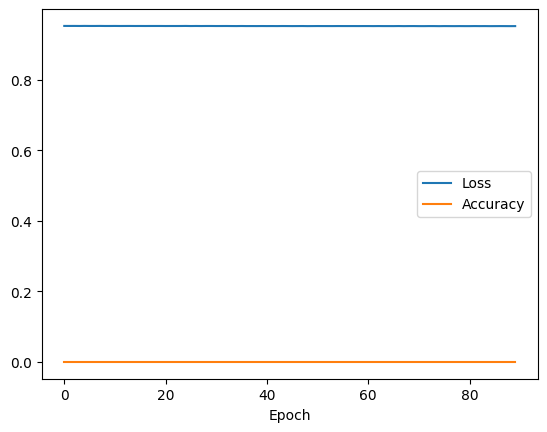

In [21]:
import matplotlib.pyplot as plt

# Define empty lists to store the loss and accuracy values per epoch
loss_list = []
accuracy_list = []

# Train the neural network and track the loss and accuracy for each epoch
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(train_loader)
    loss_list.append(epoch_loss)

    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            outputs = net(inputs)
            predicted = torch.round(outputs)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    epoch_accuracy = 100 * correct / total
    accuracy_list.append(epoch_accuracy)

    print('Epoch [%d], Loss: %.4f, Accuracy: %.2f %%' % (epoch+1, epoch_loss, epoch_accuracy))

# Plot the loss and accuracy over epochs
plt.plot(range(num_epochs), loss_list, label='Loss')
plt.plot(range(num_epochs), accuracy_list, label='Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [33]:
import os
import scipy.io.wavfile as wav
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Define the filtered audio folder and label dictionary
filtered_audio_folder = "/content/drive/MyDrive/paras/Audio/filtered"
label_dict = {"background": 0, "drone": 1, "helicopter": 2}

# Initialize the feature extractor, scaler, PCA, and SVM classifier
feature_extractor = lambda x: np.mean(np.abs(x), axis=0) # Example feature extractor function
scaler = StandardScaler()
pca = PCA(n_components=90)
svm = SVC(kernel="linear")

# Load the audio files and corresponding labels into memory
X = []
y = []
for filename in os.listdir(filtered_audio_folder):
    # Load the audio file and its corresponding label
    sample_rate, data = wav.read(os.path.join(filtered_audio_folder, filename))

    # Extract the label from the filename
    label_key = filename.split("_")[0]
    if label_key in label_dict:
        label = label_dict[label_key]
    else:
        # Handle case where label doesn't exist
        continue

    # Extract audio features and preprocess using scaling and PCA
    features = feature_extractor(data)
    features_scaled = scaler.fit_transform(features.reshape(1, -1))
    features_pca = pca.fit_transform(features_scaled)

    # Add the preprocessed features and label to the training data
    X.append(features_pca)
    y.append(label)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1, random_state=64)

# Fit the SVM classifier on the training data
svm.fit(X_train, y_train)

# Evaluate the classifier on the validation set
predictions = svm.predict(X_val)
accuracy = np.mean(predictions == y_val)
print("Validation accuracy: {:.2f}%".format(accuracy * 100))


ValueError: ignored

In [36]:
import os
import librosa
import math
import json

DATASET_PATH = "/content/drive/MyDrive/paras/Audio/filtered"  # Path of folder with training audios.
JSON_PATH = "/content/drive/MyDrive/paras/processandfeature/modeltrain.json"  # Location and file name to save feature extracted data.

SAMPLE_RATE = 22050  # Sample rate in Hz.
DURATION = 10  # Length of audio files fed. Measured in seconds.
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION


def save_mfcc(dataset_path, json_path, n_mels=90, n_fft=2048, hop_length=512, num_segments=5):
    # num_segments let's you chop up track into different segments to create a bigger dataset.
    # Value is changed at the bottom of the script.

    # Dictionary to store data into JSON_PATH
    data = {
        "mapping": [],  # Used to map labels (0 and 1) to category name (UAV and no UAV).
        "mel": [],  # Mels are the training input, labels are the target.
        "labels": []  # Features are mapped to a label (0 or 1).
    }

    num_samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    expected_num_mel_vectors_per_segment = math.ceil(num_samples_per_segment / hop_length)

    # Loops through all the folders in the training audio folder.
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # Ensures that we're not at the root level.
        if dirpath is not dataset_path:

            # Saves the semantic label for the mapping.
            dirpath_components = dirpath.split("/")  # class/background => ["class", "background"]
            semantic_label = dirpath_components[-1]  # considering only the last value
            data["mapping"].append(semantic_label)
            print("\nProcessing {}".format(semantic_label))

            # Processes all the audio files for a specific class.
            for f in filenames:

                # Loads audio file.
                file_path = os.path.join(dirpath, f)
                signal, sr = librosa.load(file_path, sr=SAMPLE_RATE)

                # Process segments, extracting mels and storing data to JSON_PATH.
                for s in range(num_segments):
                    start_sample = num_samples_per_segment * s
                    finish_sample = start_sample + num_samples_per_segment  # s=0 --> num_samples_per_segment

                    mel = librosa.feature.melspectrogram(signal[start_sample:finish_sample],
                                                         sr=sr,
                                                         n_fft=n_fft,
                                                         n_mels=n_mels,
                                                         hop_length=hop_length)
                    db_mel = librosa.power_to_db(mel)
                    mel = db_mel.T

                    # Stores mels for segment, if it has the expected length.
                    if len(mel) == expected_num_mel_vectors_per_segment:
                        data["mel"].append(mel.tolist())
                        data["labels"].append(i - 1)
                        print("{}, segment:{}".format(file_path, s + 1))

    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)


if __name__ == "__main__":
    save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)
    # num_segments can be changed. 10 with 10 second audio equates to a segment equalling 1 second.


In [55]:

import os
import librosa
import math
import json

DATASET_PATH = "/content/drive/MyDrive/paras/Audio/filtered"  # Path of folder with training audios.
JSON_PATH = "/content/drive/MyDrive/paras/processandfeature/mfccdata.json"  # Location and file name to save feature extracted data.

SAMPLE_RATE = 22050  # Sample rate in Hz.
DURATION = 10  # Length of audio files fed. Measured in seconds.
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION

def save_mfcc(dataset_path, json_path, n_mfcc=20, n_fft=2048, hop_length=512, num_segments=5):
    # num_segments let's you chop up track into different segments to create a bigger dataset.
    # Value is changed at the bottom of the script.

    # Dictionary to store data into JSON_PATH
    data = {
        "mapping": [],  # Used to map labels (0 and 1) to category name (UAV and no UAV).
        "mfcc": [],  # MFCCs are the training input, labels are the target.
        "labels": []  # Features are mapped to a label (0 or 1).
    }

    num_samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    expected_num_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment / hop_length) # 1.2 -> 2

    # Loops through all the folders in the training audio folder.
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # Ensures that we're not at the root level.
        if dirpath is not dataset_path:

            # Saves the semantic label for the mapping.
            dirpath_components = dirpath.split("/")     # class/background => ["class", "background"]
            semantic_label = dirpath_components[-1]     # considering only the last value
            data["mapping"].append(semantic_label)
            print("\nProcessing {}".format(semantic_label))

            # Processes all the audio files for a specific class.
            for f in filenames:

                # Loads audio file.
                file_path = os.path.join(dirpath, f)
                signal, sr = librosa.load(file_path, sr=SAMPLE_RATE)

                # Process segments, extracting mfccs and storing data to JSON_PATH.
                for s in range(num_segments):
                    start_sample = num_samples_per_segment * s # s=0 --> 0
                    finish_sample = start_sample + num_samples_per_segment # s=0 --> num_samples_per_segment

                    mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
                                                sr=sr,
                                                n_fft=n_fft,
                                                n_mfcc=n_mfcc,
                                                hop_length=hop_length)
                    mfcc = mfcc.T

                    # Stores mfccs for segment, if it has the expected length.
                    if len(mfcc) == expected_num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, s+1))

    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

if __name__ == "__main__":
    save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)
    # num_segments can be changed. 10 with 10 second audio equates to a segment equalling 1 second.

In [57]:
import json

# Load the data from the first JSON file.
with open('/content/drive/MyDrive/paras/processandfeature/modeltrain.json', 'r') as f:
    data1 = json.load(f)

# Load the data from the second JSON file.
with open('/content/drive/MyDrive/paras/processandfeature/mfccdata.json', 'r') as f:
    data2 = json.load(f)

# Merge the data from the two files.
merged_data = data1.copy()
merged_data.update(data2)

# Write the merged data to a new file.
with open('/content/drive/MyDrive/paras/processandfeature/melfeature.json', 'w') as f:
    json.dump(merged_data, f)


In [71]:
import pandas as pd
data = pd.read_json('/content/drive/MyDrive/paras/processandfeature/melfeature.json')
X = data.values.tolist()

In [68]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import pandas as pd
from datetime import datetime
from termcolor import colored

# Timer.
startTime = datetime.now()

# Path to created json file from mel preprocess and feature extraction script.
DATA_PATH = "/content/drive/MyDrive/paras/processandfeature/melfeature.json"

# Path to save model.
MODEL_SAVE = '/content/drive/MyDrive/paras/trainandtest/model_1.h5'

# Path to save training history and model accuracy performance at end of training.
HISTORY_SAVE = "/content/drive/MyDrive/paras/trainandtest/history1.csv"
ACC_SAVE = "/content/drive/MyDrive/paras/trainandtest/modelaccuracy.json"


def load_data(DATA_PATH):
    """Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(DATA_PATH, "r") as fp:
        data = json.load(fp)

    # Convert lists to numpy arrays.
    X = np.array(data["mel"])  # The name in brackets is changed to "mfccs" if MFCC features are used to train.
    y = np.array(data["labels"])
    return X, y


def prepare_datasets(test_size, validation_size):
    # Load extracted features and labels data.
    X, y = load_data(DATA_PATH)

    # Create train/test split.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7)

    # Create train/validation split.
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # 3D array.
    X_train = X_train[..., np.newaxis]  # 4-dim array: (# samples, # time steps, # coefficients, 1)
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):
    # Create model
    model = keras.Sequential()

    # 1st convolutional layer.
    model.add(keras.layers.Conv2D(8, (5, 5), activation='relu', input_shape=input_shape))
        # 8 kernals, and 5x5 grid size of kernal
    model.add(keras.layers.MaxPool2D((5, 5), strides=(2, 2), padding='same'))
        # pooling size 5x5
    model.add(keras.layers.BatchNormalization())
        # Batch Normalization allows model to be more accurate and computations are faster.

    # 2nd convolutional layer.
    model.add(keras.layers.Conv2D(32, (5, 5), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPool2D((5, 5), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # Flatten the output and feed into dense layer.
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(32, activation='relu'))
        # 32 = number of neurons
    model.add(keras.layers.Dropout(0.3))
    # Reduces chances of over fitting.

    # Output layer that uses softmax activation.
    model.add(keras.layers.Dense(2, activation='softmax'))
        # 2 neurons --> depends on how many categories we want to predict.

    return model


def predict(model, X, y):
    # Random prediction post-training.
    X = X[np.newaxis, ...]

    prediction = model.predict(X)

    # Extract index with max value.
    predicted_index = np.argmax(prediction, axis=1)
    print("Expected index: {}, Predicted index: {}".format(y, predicted_index))


if __name__ == "__main__":
    # Create train, validation and test sets.
    # Load extracted features and labels data.
    X, y = load_data(DATA_PATH)

    # Print the shape of X to check for issues.
    print("Shape of X:", X.shape)

    # Create train/test split.
    if X.shape[0] > 0:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7)
    else:
        raise ValueError("Input data X is empty.")

    # Create train/validation split.
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # Convert the input data to a 4D array.
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    # Early stopping.
    callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

    # Checkpoint.
    checkpoint = keras.callbacks.ModelCheckpoint(MODEL_SAVE, monitor='val_loss',
                                                 mode='min', save_best_only=True, verbose=1)

    # Build the CNN network.
    input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
    model = build_model(input_shape)

    # Compile the network.
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer,
                  loss="sparse_categorical_crossentropy",
                  metrics=['accuracy'])

    model.summary()

    # Train the CNN.
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=64, epochs=1000,
                        callbacks=[callback, checkpoint])

    # Save history.
    hist = pd.DataFrame(history.history)

    # Save to csv:
    hist_csv = HISTORY_SAVE
    with open(hist_csv, mode='w') as f:
        hist.to_csv(f)

    print(
        colored("CRNN model has been trained and its training history has been saved to {}.".format(hist_csv), "green"))

    # Evaluate the CNN on the test set.
    test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
    print("Accuracy on test set is: {}".format(test_accuracy))

    # Timer output.
    time = datetime.now() - startTime
    print(time)

    # Make prediction on a random sample.
    X = X_test[100]
    y = y_test[100]
    predict(model, X, y)

    # Save model accuracies on test set (for weight calculations later on).
    accuracy = {
        "model_acc": [],
        "total_train_time": [],
    }

    accuracy["model_acc"].append(test_accuracy)
    accuracy["total_train_time"].append(str(time))

    with open(ACC_SAVE, "w") as fp:
        json.dump(accuracy, fp, indent=4)



Shape of X: (0,)


ValueError: ignored

In [74]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import pandas as pd
from datetime import datetime
from termcolor import colored

# Timer.
startTime = datetime.now()

# Path to created json file from mel preprocess and feature extraction script.
DATA_PATH = "/content/drive/MyDrive/paras/processandfeature/melfeature.json"

# Path to save model.
MODEL_SAVE = '/content/drive/MyDrive/paras/trainandtest/model_1.h5'

# Path to save training history and model accuracy performance at end of training.
HISTORY_SAVE = "/content/drive/MyDrive/paras/trainandtest/history1.csv"
ACC_SAVE = "/content/drive/MyDrive/paras/trainandtest/modelaccuracy.json"


def load_data(DATA_PATH):
    """Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(DATA_PATH, "r") as fp:
        data = json.load(fp)

    # Convert lists to numpy arrays.
    X = np.array(data.get("mel", []))  # The name in brackets is changed to "mfccs" if MFCC features are used to train.
    y = np.array(data.get("labels", []))
    return X, y


def prepare_datasets(test_size, validation_size):
    # Load extracted features and labels data.
    X, y = load_data(DATA_PATH)

    if X.size == 0 or y.size == 0:
        raise ValueError("Input data X or y is empty.")

    # Create train/test split.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7)

    # Create train/validation split.
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # 3D array.
    X_train = X_train[..., np.newaxis]  # 4-dim array: (# samples, # time steps, # coefficients, 1)
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):
    # Create model
    model = keras.Sequential()

    # 1st convolutional layer.
    model.add(keras.layers.Conv2D(8, (5, 5), activation='relu', input_shape=input_shape))
        # 8 kernals, and 5x5 grid size of kernal
    model.add(keras.layers.MaxPool2D((5, 5), strides=(2, 2), padding='same'))
        # pooling size 5x5
    model.add(keras.layers.BatchNormalization())
        # Batch Normalization allows model to be more accurate and computations are faster.

    # 2nd convolutional layer.
    model.add(keras.layers.Conv2D(32, (5, 5), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPool2D((5, 5), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # Flatten the output and feed into dense layer.
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(32, activation='relu'))
        # 32 = number of neurons
    model.add(keras.layers.Dropout(0.3))
    # Reduces chances of over fitting.

    # Output layer that uses softmax activation.
    model.add(keras.layers.Dense(2, activation='softmax'))
        # 2 neurons --> depends on how many categories we want to predict.

    return model
model.summary()

NameError: ignored

In [63]:
if __name__ == "__main__":
    # Create train, validation and test sets.
    # Load extracted features and labels data.
    X, y = load_data(DATA_PATH)

    # Print the shape of X to check for issues.
    print("Shape of X:", X.shape)

    # Create train/test split.
    if X.shape[0] > 0:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7)
    else:
        raise ValueError("Input data X is empty.")

    # Create train/validation split.
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # Convert the input data to a 4D array.
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    # Early stopping.
    callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

    # Checkpoint.
    checkpoint = keras.callbacks.ModelCheckpoint(MODEL_SAVE, monitor='val_loss',
                                                 mode='min', save_best_only=True, verbose=1)

    # Build the CNN network.
    input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
    model = build_model(input_shape)

    # Compile the network.
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer,
                  loss="sparse_categorical_crossentropy",
                  metrics=['accuracy'])

    model.summary()

    # Train the CNN.
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=64, epochs=1000,
                        callbacks=[callback, checkpoint])

    # Save history.
    hist = pd.DataFrame(history.history)

    # Save to csv:
    hist_csv = HISTORY_SAVE
    with open(hist_csv, mode='w') as f:
        hist.to_csv(f)

    print(
        colored("CRNN model has been trained and its training history has been saved to {}.".format(hist_csv), "green"))

    # Evaluate the CNN on the test set.
    test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
    print("Accuracy on test set is: {}".format(test_accuracy))

    # Timer output.
    time = datetime.now() - startTime
    print(time)

    # Make prediction on a random sample.
    X = X_test[100]
    y = y_test[100]
    predict(model, X, y)

    # Save model accuracies on test set (for weight calculations later on).
    accuracy = {
        "model_acc": [],
        "total_train_time": [],
    }

    accuracy["model_acc"].append(test_accuracy)
    accuracy["total_train_time"].append(str(time))

    with open(ACC_SAVE, "w") as fp:
        json.dump(accuracy, fp, indent=4)


Shape of X: (0,)


ValueError: ignored

In [29]:
import os
import scipy.io.wavfile as wav
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Define the filtered audio folder and label dictionary
filtered_audio_folder = "/content/drive/MyDrive/paras/Audio/filtered"
label_dict = {"background": 0, "drone": 1, "helicopter": 2}

# Initialize the feature extractor, scaler, PCA, and SVM classifier
feature_extractor = lambda x: np.mean(np.abs(x), axis=0) # Example feature extractor function
scaler = StandardScaler()
pca = PCA(n_components=10)
svm = SVC(kernel="linear")

# Loop through each audio file
for filename in os.listdir(filtered_audio_folder):
    # Load the audio file and its corresponding label
    sample_rate, data = wav.read(os.path.join(filtered_audio_folder, filename))

    # Extract the label from the filename
    label_key = filename.split("_")[0]
    if label_key in label_dict:
        label = label_dict[label_key]
    else:
        # Handle case where label doesn't exist
        continue

    # Extract audio features and preprocess using scaling and PCA
    features = feature_extractor(data)
    features_scaled = scaler.fit_transform(features.reshape(1, -1))
    features_pca = pca.fit_transform(features_scaled)

    # Make predictions using the SVM classifier
    predicted_label = svm.predict(features_pca)

    # Print the filename, corresponding label, and predicted label for reference
    print("Filename: {}, Label: {}, Predicted: {}".format(filename, label, predicted_label))


In [22]:
import torchvision.transforms as transforms

# Define the normalization parameters based on the training data
train_data_mean = torch.mean(train_data, dim=0)
train_data_std = torch.std(train_data, dim=0)

# Create a data transformer that applies normalization to the input data
data_transform = transforms.Compose([
    transforms.Normalize(mean=train_data_mean, std=train_data_std)
])

# Apply the data transformer to the training and test data
train_dataset = torch.utils.data.TensorDataset(
    data_transform(train_data), train_labels)
test_dataset = torch.utils.data.TensorDataset(
    data_transform(test_data), test_labels)

# Initialize the data loaders with the transformed data
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)


ValueError: ignored